# LETS GROW MORE DATA SCIENCE INTERN MARCH 2023

# Beginner Level Task: 


## Task 1: Iris Flower Classification ML Project

**This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.**


**The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.**




**Dataset Link:** http://archive.ics.uci.edu/ml/machine-learning-databases/iris/ 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Species_labels']
Data = pd.read_csv('iris.csv',names=columns)


In [3]:
Data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# to display stats about data
Data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# to basic info about datatype
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_length    150 non-null    float64
 1   Sepal_width     150 non-null    float64
 2   Petal_length    150 non-null    float64
 3   Petal_width     150 non-null    float64
 4   Species_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to display no. of samples on each class
Data['Species_labels'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species_labels, dtype: int64

# Preprocessing the dataset

In [9]:
# check for null values
Data.isnull().sum()

Sepal_length      0
Sepal_width       0
Petal_length      0
Petal_width       0
Species_labels    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

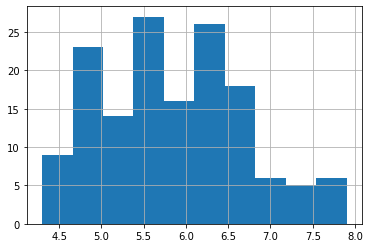

In [11]:
# histograms
Data['Sepal_length'].hist()

<AxesSubplot:>

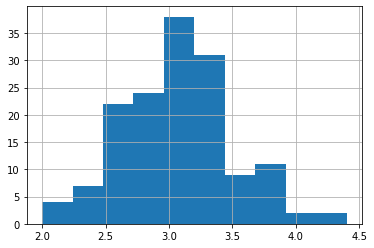

In [13]:
Data['Sepal_width'].hist()

<AxesSubplot:>

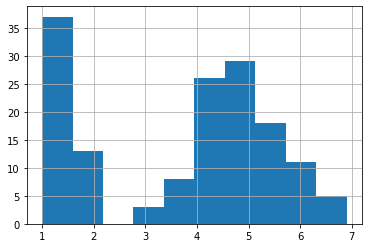

In [14]:
Data['Petal_length'].hist()

<AxesSubplot:>

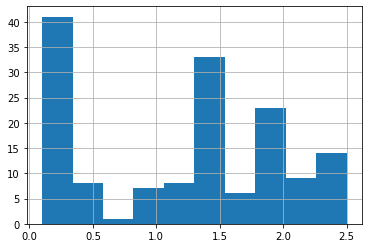

In [15]:
Data['Petal_width'].hist()

In [16]:
# scatterplot
colors =['magenta','green', 'blue']
Species_labels=['Iris-virginica','Iris-versicolor', 'Iris-setosa']

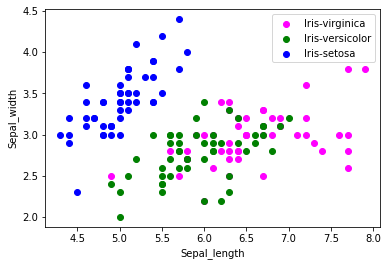

In [18]:
for i in range(3):
    x = Data[Data['Species_labels'] == Species_labels[i]]
    plt.scatter(x['Sepal_length'], x['Sepal_width'], c = colors[i], label=Species_labels[i])
plt.xlabel("Sepal_length")
plt.ylabel("Sepal_width")
plt.legend()

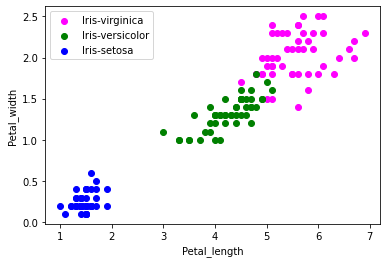

In [19]:
for i in range(3):
    x = Data[Data['Species_labels'] == Species_labels[i]]
    plt.scatter(x['Petal_length'], x['Petal_width'], c = colors[i], label=Species_labels[i])
plt.xlabel("Petal_length")
plt.ylabel("Petal_width")
plt.legend()

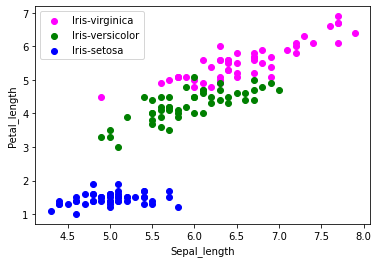

In [21]:
for i in range(3):
    x = Data[Data['Species_labels'] == Species_labels[i]]
    plt.scatter(x['Sepal_length'], x['Petal_length'], c = colors[i], label=Species_labels[i])
plt.xlabel("Sepal_length")
plt.ylabel("Petal_length")
plt.legend()

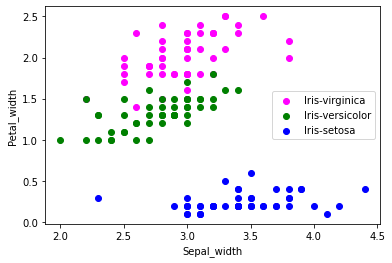

In [23]:
for i in range(3):
    x = Data[Data['Species_labels'] == Species_labels[i]]
    plt.scatter(x['Sepal_width'], x['Petal_width'], c = colors[i], label=Species_labels[i])
plt.xlabel("Sepal_width")
plt.ylabel("Petal_width")
plt.legend()
    

# Correlation Matrix

In [24]:
Data.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

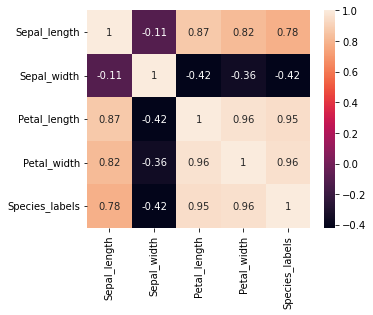

In [52]:
corr = Data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

# Label Encoder

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
Data['Species_labels'] = le.fit_transform(Data['Species_labels'])


In [56]:
Data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [57]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = Data.drop(columns=['Species_labels'])
Y= Data['Species_labels']
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.30)

# Logistic Regression

In [58]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(x_train, y_train)


LogisticRegression()

In [60]:
# print metrix to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  91.11111111111111


# KNN Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [62]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [63]:
# print metrix to get performance
print("Accuracy: ",model.score(x_train, y_train)*100)

Accuracy:  98.09523809523809


# Decision Tree

In [64]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [65]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
# print metrix to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  93.33333333333333
